## Data Cleansing

### Extract Non-BBG Data

In [138]:
#SiCheng main dataframe
import pandas as pd
import openpyxl

raw_df_sc = pd.read_excel('main_dataset_raw.xlsx',sheet_name='data')
raw_df_sc

,DATE,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
0,1914-01,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2024-08,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
1328,2024-09,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
1329,2024-10,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243
1330,2024-11,8.417,0.1,NaN,1.958417,1.25,NaN,-16.183557,9.254420,0.026150,NaN,NaN,NaN,-0.234083


## <font color="yellow">BBG Dataset</font>

### _Step 1: Read Excel, Modify Columns and Index_

In [139]:
#Alfred Dataset
#Main, GC2 data, Fed_Eff_Rate, PE; fix index and column labels

raw_df_al_main = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Data')
raw_df_al_gc2 = pd.read_excel('bbg_gc_data.xlsx',sheet_name='GC2 COMB COMDTY',skiprows=6)
raw_df_al_fed_eff_rate = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Fed_Eff_Rate',skiprows=5)
raw_df_al_pe = pd.read_excel('bbg_gc_data.xlsx',sheet_name='PE',skiprows=6)

#another file
raw_df_al_dp12 = pd.read_excel('data2.xlsx',sheet_name='DP_12M',skiprows=6)
raw_df_al_gdp_nom_yoy = pd.read_excel('data2.xlsx',sheet_name='GDP_Nom_YoY',skiprows=5) #quarterly
raw_df_al_gdp_real_qoq = pd.read_excel('data2.xlsx',sheet_name='GDP_Real_QoQ',skiprows=5) #quarterly
raw_df_al_cpi_yoy = pd.read_excel('data2.xlsx',sheet_name='CPI_YoY',skiprows=5) #monthly
raw_df_al_unemploy = pd.read_excel('data2.xlsx',sheet_name='US_Unemp',skiprows=5) #monthly
raw_df_al_consumer_conf = pd.read_excel('data2.xlsx',sheet_name='Cons_Conf',skiprows=5) #monthly
raw_df_al_real_int = pd.read_excel('data2.xlsx',sheet_name='US_RIR',skiprows=5) #monthly



#tidy up dataset
raw_df_al_list = [raw_df_al_main, 
                  raw_df_al_gc2, 
                  raw_df_al_fed_eff_rate, 
                  raw_df_al_pe,
                  raw_df_al_dp12,
                  raw_df_al_gdp_nom_yoy,
                  raw_df_al_gdp_real_qoq,
                  raw_df_al_unemploy,
                  raw_df_al_cpi_yoy,
                  raw_df_al_consumer_conf,
                  raw_df_al_real_int]

for df in raw_df_al_list:
    df.set_index(df.columns[0], inplace= True)

print(raw_df_al_gc2.columns)

raw_df_al_gc2.columns = ['GC2_PX_Last', 'GC2_OPEN_INT']
raw_df_al_fed_eff_rate.columns = ['fed_eff_rate']
raw_df_al_pe.columns = ['PE_RATIO']

raw_df_al_pe = raw_df_al_pe.drop('2025-02-06')
raw_df_al_main = raw_df_al_main.drop('2025-02-06')
raw_df_al_dp12 = raw_df_al_dp12.drop(['2025-02-07','2025-02-06'])
raw_df_al_dp12 = raw_df_al_dp12.drop('PX_LAST', axis = 1)
raw_df_al_dp12


Index(['PX_LAST', 'OPEN_INT'], dtype='object')


,EQY_DVD_YLD_12M
Date,
2025-02-05,1.2402
2025-02-04,1.2446
2025-02-03,1.2536
2025-01-31,1.2438
2025-01-30,1.2368
...,...
1975-01-07,NaN
1975-01-06,NaN
1975-01-03,NaN


In [140]:
"""check dataframe"""
#raw_df_al_gc2
#raw_df_al_fed_eff_rate.index[0]
#raw_df_al_pe
#raw_df_al_main
# raw_df_al_dp12
print(raw_df_al_gdp_nom_yoy.columns[0])


col_name_2 = {'D/P Ratio':raw_df_al_dp12,
            'GDP_Nominoal_YOY':raw_df_al_gdp_nom_yoy,
             'GDP_Real_QoQ':raw_df_al_gdp_real_qoq, 
             'CPI_YoY':raw_df_al_cpi_yoy, 
             'US_Unemp': raw_df_al_unemploy, 
             'Cons_Conf': raw_df_al_consumer_conf, 
             'US_RIR':raw_df_al_real_int}


for key, value in col_name_2.items():
    value.rename(columns={value.columns[0]:key},inplace=True)

#raw_df_al_dp12
#print(raw_df_al_gdp_nom_yoy, raw_df_al_gdp_real_qoq, raw_df_al_cpi_yoy, raw_df_al_consumer_conf, raw_df_al_real_int,raw_df_al_unemploy)
raw_df_al_main


PX_LAST


,GC1 COMB Comdty (USD) (R1),GC1 COMB Comdty (USD)_Open Interest,OI_SMAVG (15),GC1 COMB Comdty _Volume,Vol_SMAVG (15),SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,CPI YOY Index,PCE CYOY Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index
Date,,,,,,,,,,,,,,,,
2025-02-05,2871.600098,12629.0,157762.0,4519.0,129947.0,6061.479980,21658.160156,107.579,4.4181,4.1868,NaN,NaN,15.77,152.61,470.0811,1267.883057
2025-02-04,2853.300049,15937.0,175749.0,2187.0,141606.0,6037.879883,21566.919922,107.960,4.5105,4.2137,NaN,NaN,17.21,154.34,467.1318,1262.345947
2025-02-03,2833.899902,19918.0,193900.0,2649.0,155534.0,5994.569824,21297.580078,108.990,4.5550,4.2489,NaN,NaN,18.62,154.73,465.7805,1260.921997
2025-01-31,2812.500000,29715.0,212825.0,3443.0,175251.0,6040.529785,21478.050781,108.370,4.5387,4.1971,NaN,NaN,16.43,155.19,466.0748,1261.416016
2025-01-30,2823.000000,59296.0,231695.0,40141.0,185464.0,6071.169922,21508.119141,107.797,4.5163,4.2073,NaN,NaN,15.84,154.29,466.8466,1262.191040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974-03-14,NaN,NaN,NaN,NaN,NaN,99.650002,NaN,102.340,7.1320,NaN,NaN,NaN,NaN,282.89,NaN,NaN
1974-03-13,NaN,NaN,NaN,NaN,NaN,99.739998,NaN,101.990,7.1320,NaN,NaN,NaN,NaN,282.33,NaN,NaN
1974-03-12,NaN,NaN,NaN,NaN,NaN,99.150002,NaN,102.050,7.0920,NaN,NaN,NaN,NaN,281.69,NaN,NaN


### _Step 2: Format Dataframe_

#### 2.1 Join Dataframe and Unify Time Duration (50 years)

In [141]:
bbg_df = raw_df_al_main.drop(raw_df_al_main.columns[2:5],axis=1)

join_list = [raw_df_al_gc2, raw_df_al_pe , raw_df_al_fed_eff_rate]

for key, value in col_name_2.items():
    join_list.append(value)


bbg_df = bbg_df.join(join_list, how='left')

threshold_date = pd.Timestamp('1975-01-01')
bbg_df = bbg_df[bbg_df.index > threshold_date]
mapping = {bbg_df.columns[0]:'GC1_PX_Last',bbg_df.columns[1]:'GC1_OPEN_INT'}
bbg_df.rename(columns=mapping, inplace=True)
col = bbg_df.pop('GC2_PX_Last')
bbg_df.insert(1,'GC2_PX_Last',col)
# Sort by index (ascending order)
bbg_df = bbg_df.sort_index(ascending=True)
bbg_df


,GC1_PX_Last,GC2_PX_Last,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,CPI YOY Index,PCE CYOY Index,...,GC2_OPEN_INT,PE_RATIO,fed_eff_rate,D/P Ratio,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-02,175.100006,178.2,NaN,70.230003,NaN,97.710,7.4220,NaN,NaN,NaN,...,NaN,NaN,8.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-03,174.699997,177.5,NaN,70.709999,NaN,97.170,7.4320,NaN,NaN,NaN,...,NaN,NaN,8.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,174.399994,176.8,NaN,71.070000,NaN,96.620,7.3920,NaN,NaN,NaN,...,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,173.399994,175.8,NaN,71.019997,NaN,96.640,7.3820,NaN,NaN,NaN,...,NaN,NaN,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,177.399994,180.4,NaN,70.040001,NaN,97.140,7.3920,NaN,NaN,NaN,...,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,2823.000000,2845.2,59296.0,6071.169922,21508.119141,107.797,4.5163,4.2073,NaN,NaN,...,401677.0,27.3702,4.33,1.2368,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,2812.500000,2835.0,29715.0,6040.529785,21478.050781,108.370,4.5387,4.1971,NaN,NaN,...,404538.0,27.2321,4.33,1.2438,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,2833.899902,2857.1,19918.0,5994.569824,21297.580078,108.990,4.5550,4.2489,NaN,NaN,...,406285.0,27.0249,4.33,1.2536,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2 Calculate volatility

In [142]:
import numpy as np
import pandas as pd

# Compute δ so that the sum of weights equals 60 days
delta = 60 / (60 + 1)  # δ = 60 / (60 + 1)

# Ensure Date is in datetime format and sorted
bbg_df.index = pd.to_datetime(bbg_df.index, format='%Y-%m-%d')
bbg_df = bbg_df.sort_index()

# Compute daily log returns for the first and second columns
log_returns = pd.DataFrame(index=bbg_df.index)
log_returns['GC1_log_return'] = np.log(bbg_df.iloc[:, 0] / bbg_df.iloc[:, 0].shift(1))
log_returns['GC2_log_return'] = np.log(bbg_df.iloc[:, 1] / bbg_df.iloc[:, 1].shift(1))

# Compute EWMA variance for GC1 and GC2 --> agreed approach
variance = pd.DataFrame(index=bbg_df.index)
variance['GC1_variance'] = log_returns['GC1_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()
variance['GC2_variance'] = log_returns['GC2_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()

# Mask variance before 60 days to NaN
variance.loc[:bbg_df.index[60], ['GC1_variance', 'GC2_variance']] = np.nan

# Compute annualized volatility (square root of variance * 261)
volatility = pd.DataFrame(index=bbg_df.index)
volatility['GC1_volatility'] = np.sqrt(261 * variance['GC1_variance'])
volatility['GC2_volatility'] = np.sqrt(261 * variance['GC2_variance'])

volatility.to_csv('volatility.csv')


### _Step 3: Create Different Duration Dataframe_

#### <font color="yellow">3.1 BBG Dataframe by Month</font>

##### **<font color= #90EE90>3.1.1 Fill Nan</font>**

In [143]:
bbg_df = bbg_df.copy(deep=True)

print("Checking NaN in GC2 and GC1 before modification.......")
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])


bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )

#checking
print("\nChecking any NaN left in GC2 .......")
print()
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])

print("\nChecking any NaN left in GC1 .......")
print()
print(bbg_df[bbg_df['GC1_PX_Last'].isna()])

print("\nChecking 2025-01-01 .......")
print(bbg_df.loc['2025-01-01'])

bbg_df.to_csv("bbg_df_20250215.csv")


Checking NaN in GC2 and GC1 before modification.......
            GC1_PX_Last  GC2_PX_Last  GC1_OPEN_INT  SPX Index  NDX Index  \
Date                                                                       
1975-02-12          NaN          NaN           NaN  79.919998        NaN   
1975-02-17          NaN          NaN           NaN        NaN        NaN   
1975-03-28          NaN          NaN           NaN        NaN        NaN   
1975-05-26          NaN          NaN           NaN        NaN        NaN   
1975-05-31          NaN          NaN           NaN        NaN        NaN   
...                 ...          ...           ...        ...        ...   
2024-11-28          NaN          NaN           NaN        NaN        NaN   
2024-11-30          NaN          NaN           NaN        NaN        NaN   
2024-12-25          NaN          NaN           NaN        NaN        NaN   
2025-01-01          NaN          NaN           NaN        NaN        NaN   
2025-01-20          NaN          

In [144]:
# Define the columns to keep with original values
keep_columns = [
    "CPI YOY Index", "PCE CYOY Index", "GDP_Nominoal_YOY", "GDP_Real_QoQ",
    "CPI_YoY", "US_Unemp", "Cons_Conf", "US_RIR",'fed_eff_rate','fed_eff_rate_360daily_log'
]

#calculate risk-free rate return 
bbg_df['fed_eff_rate_360daily_log'] = np.log((bbg_df['fed_eff_rate']/360/100) + 1)


# Calculate log returns for all columns except those in keep_columns
log_return_df = np.log(bbg_df.drop(columns=keep_columns, errors='ignore')).diff()



# Combine the original values of the specified columns with the log returns of the remaining columns
bbg_df_log_rets = pd.concat([log_return_df,bbg_df[keep_columns]], axis=1)
bbg_df_log_rets = bbg_df_log_rets.iloc[1:]
bbg_df_log_rets = bbg_df_log_rets.rename(columns={'GC1_PX_Last': 'GC1_Monthly_Return','GC2_PX_Last': 'GC2_Monthly_Return'})
keep_columns.pop(-1)
bbg_df_log_rets['fed_eff_rate_360daily_log']

Date
1975-01-03    0.000232
1975-01-06    0.000218
1975-01-07    0.000203
1975-01-08    0.000142
1975-01-09    0.000202
                ...   
2025-01-30    0.000120
2025-01-31    0.000120
2025-02-03    0.000120
2025-02-04    0.000120
2025-02-05    0.000120
Name: fed_eff_rate_360daily_log, Length: 13240, dtype: float64

##### **<font color= #90EE90>3.1.2 Resample to Month</font>**

In [145]:
#when resampling, sum up the return in months to get monthly_ret (from 1st day to last day of month)
bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
bbg_df_monthly_only = bbg_df_monthly_only.iloc[:-2] #until 2024-12-31

# Compute monthly mean volatility (AC: agreed approach: monthly mean of the annualized vol)
volatility_monthly = volatility.resample('M').mean()

# Merge with bbg_df_monthly_only, keeping all indices from bbg_df_monthly_only
bbg_df_monthly_only = bbg_df_monthly_only.merge(volatility_monthly, how='left', left_index=True, right_index=True)

bbg_df_monthly_only = bbg_df_monthly_only.rename(columns= {'fed_eff_rate_360daily_log':'fed_eff_rate_monthly_log_sum'})

#calculate excess return only
bbg_df_monthly_only['GC1_Monthly_Return'] = bbg_df_monthly_only['GC1_Monthly_Return'] - bbg_df_monthly_only['fed_eff_rate_monthly_log_sum']
bbg_df_monthly_only['GC2_Monthly_Return'] = bbg_df_monthly_only['GC2_Monthly_Return'] - bbg_df_monthly_only['fed_eff_rate_monthly_log_sum']

bbg_df_monthly_only


,GC1_Monthly_Return,GC2_Monthly_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,GC1_volatility,GC2_volatility
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,NaN,NaN,11.8,8.1,NaN,-4.8026,149.54,0.004153,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,NaN,NaN,11.2,8.1,NaN,-5.2288,124.02,0.003445,NaN,NaN
1975-03-31,-0.035954,-0.038216,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,8.4,-4.7,10.3,8.6,NaN,-4.7510,114.58,0.003183,0.162229,0.161182
1975-04-30,-0.063292,-0.064241,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,NaN,NaN,10.2,8.8,NaN,-4.9583,121.42,0.003373,0.171430,0.172165
1975-05-31,-0.004990,-0.002598,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,NaN,NaN,9.5,9.0,NaN,-4.2150,114.83,0.003189,0.176185,0.181025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,NaN,NaN,2.5,4.2,67.9,2.8443,117.26,0.003257,0.168238,0.169387
2024-09-30,0.048362,0.047981,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,5.0,3.1,2.4,4.1,70.1,2.4344,102.60,0.002850,0.151431,0.154221
2024-10-31,0.039094,0.039238,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,NaN,NaN,2.6,4.1,70.5,2.2771,106.26,0.002951,0.134111,0.135932


##### **<font color= #90EE90>3.1.3 Create Time Series Momentum Data</font>**

In [146]:
# bbg_df_monthly_only['GC2_Monthly_Return'] = bbg_df_monthly_only['GC2_PX_Last'].pct_change()
# bbg_df_monthly_only['GC1_Monthly_Return'] = bbg_df_monthly_only['GC1_PX_Last'].pct_change()
# col = bbg_df_monthly_only.pop('GC2_Monthly_Return')
# bbg_df_monthly_only.insert(2,'GC2_Monthly_Return',col)
# col = bbg_df_monthly_only.pop('GC1_Monthly_Return')
# bbg_df_monthly_only.insert(1,'GC1_Monthly_Return',col)
# bbg_df_monthly_only

In [147]:
# 1M sign (unchanged)
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Return'])
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Return'])

# 3M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_3M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=3)
    .sum()
)
bbg_df_monthly_only['GC1_3M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=3)
    .sum()
)

# Calculate 3M sign
bbg_df_monthly_only['GC2_3M_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Ret'])
bbg_df_monthly_only['GC1_3M_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Ret'])

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_6M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=6)
    .sum()
)
bbg_df_monthly_only['GC1_6M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=6)
    .sum()
)
# Calculate 3M sign
bbg_df_monthly_only['GC2_6M_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Ret'])
bbg_df_monthly_only['GC1_6M_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Ret'])

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC2_12M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=12)
    .sum()
)
bbg_df_monthly_only['GC1_12M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=12)
    .sum()
)

# Calculate 6M sign
bbg_df_monthly_only['GC2_12M_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Ret'])
bbg_df_monthly_only['GC1_12M_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Ret'])


#checking log return
bbg_df_monthly_only[['GC2_Monthly_Return','GC2_12M_Ret']].head(24)
#bbg_df_monthly_only


,GC2_Monthly_Return,GC2_12M_Ret
Date,,
1975-01-31,-0.005276,NaN
1975-02-28,0.039981,NaN
1975-03-31,-0.038216,NaN
1975-04-30,-0.064241,NaN
1975-05-31,-0.002598,NaN
1975-06-30,0.005025,NaN
1975-07-31,-0.003303,NaN
1975-08-31,-0.049786,NaN
1975-09-30,-0.139089,NaN


In [148]:
# Calculate 1M sign
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Return'])
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Return'])

# ===== Calculate Actual Return in Forward-Looking Next X Month Return =====

# Forward-looking 3M return
bbg_df_monthly_only['GC2_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)
bbg_df_monthly_only['GC1_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
# 3M forward sign
bbg_df_monthly_only['GC2_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Fwd_Ret'])
bbg_df_monthly_only['GC1_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Fwd_Ret'])


# Forward-looking 6M return
bbg_df_monthly_only['GC2_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC1_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
# 6M forward sign
bbg_df_monthly_only['GC2_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Fwd_Ret'])
bbg_df_monthly_only['GC1_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Fwd_Ret'])


# Forward-looking 12M return
bbg_df_monthly_only['GC2_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC1_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
# 12M forward sign
bbg_df_monthly_only['GC2_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Fwd_Ret'])
bbg_df_monthly_only['GC1_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Fwd_Ret'])


bbg_df_monthly_only


,GC1_Monthly_Return,GC2_Monthly_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,-1.0,1.0,-0.065325,-0.063152,-1.0,-1.0,-0.266698,-0.258326,-1.0,-1.0
1975-02-28,0.038402,0.039981,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,-1.0,-1.0,-0.063352,-0.066362,-1.0,-1.0,-0.362517,-0.354593,-1.0,-1.0
1975-03-31,-0.035954,-0.038216,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,-1.0,-1.0,-0.153118,-0.153495,-1.0,-1.0,-0.374604,-0.361893,-1.0,-1.0
1975-04-30,-0.063292,-0.064241,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,-1.0,-1.0,-0.253991,-0.252558,-1.0,-1.0,-0.364604,-0.355780,-1.0,-1.0
1975-05-31,-0.004990,-0.002598,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,-1.0,-1.0,-0.178805,-0.176743,-1.0,-1.0,-0.300239,-0.296995,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.048362,0.047981,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.039094,0.039238,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
#checking Next X month Return
bbg_df_monthly_only[['GC2_12M_Fwd_Ret','GC1_Monthly_Return']]

,GC2_12M_Fwd_Ret,GC1_Monthly_Return
Date,,
1975-01-31,-0.266698,-0.001872
1975-02-28,-0.362517,0.038402
1975-03-31,-0.374604,-0.035954
1975-04-30,-0.364604,-0.063292
1975-05-31,-0.300239,-0.004990
...,...,...
2024-08-31,NaN,0.028382
2024-09-30,NaN,0.048362
2024-10-31,NaN,0.039094


In [150]:
#Reorder columns

new_order_part1 = list(bbg_df_monthly_only.columns[0:2]) + [
    'GC1_volatility', 'GC2_volatility', 'GC2_OPEN_INT',
    'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret',
    'GC2_3M_Sign', 'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret',
    'GC2_6M_Sign', 'GC1_6M_Sign', 'GC2_12M_Ret', 'GC1_12M_Ret',
    'GC2_12M_Sign', 'GC1_12M_Sign'
]

new_forward_looking_cols = [
    'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret', 'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign',
    'GC2_6M_Fwd_Ret', 'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
    'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC2_12M_Fwd_Sign', 'GC1_12M_Fwd_Sign'
]

final_column_order = new_order_part1 + new_forward_looking_cols

new_order = final_column_order + [col for col in bbg_df_monthly_only.columns if col not in final_column_order]
bbg_df_by_month = bbg_df_monthly_only.loc[:,new_order]
bbg_df_by_month

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,11.8,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,149.54,0.004153
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,11.2,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,124.02,0.003445
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,10.3,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,114.58,0.003183
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,10.2,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,121.42,0.003373
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,9.5,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,114.83,0.003189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,2.5,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,117.26,0.003257
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,2.4,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,102.60,0.002850
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,2.6,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,106.26,0.002951


##### **<font color= #90EE90>3.1.4 Modify Non BBG Dataset</font>**

In [151]:
#Before change
print(raw_df_sc.iloc[:,0])

#After change
raw_df_sc['DATE'] = pd.to_datetime(raw_df_sc['DATE'], format='%Y-%m') + pd.offsets.MonthEnd(0)

raw_df_sc.set_index(raw_df_sc.columns[0],inplace = True)

raw_df_sc

0       1914-01
1       1914-02
2       1914-03
3       1914-04
4       1914-05
         ...   
1327    2024-08
1328    2024-09
1329    2024-10
1330    2024-11
1331    2024-12
Name: DATE, Length: 1332, dtype: object


,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
DATE,,,,,,,,,,,,,
1914-01-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02-28,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04-30,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
2024-09-30,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
2024-10-31,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243


In [152]:
#Join with BBG Dataframe

selected_cols = ['ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount', 'PPI']

partial_df_sc = raw_df_sc[selected_cols]

print(partial_df_sc)
partial_df_sc.index

            ETF_Ounces  Chinese_premium_discount  Indian_premium_discount  PPI
DATE                                                                          
1914-01-31         NaN                       NaN                      NaN -2.5
1914-02-28         NaN                       NaN                      NaN -1.7
1914-03-31         NaN                       NaN                      NaN -2.5
1914-04-30         NaN                       NaN                      NaN -2.5
1914-05-31         NaN                       NaN                      NaN -2.5
...                ...                       ...                      ...  ...
2024-08-31         NaN                 -1.526427                 5.831219 -0.9
2024-09-30         NaN                -11.192383                -2.388517 -2.4
2024-10-31         NaN                -13.455145                 0.537662 -0.9
2024-11-30         NaN                -16.183557                 9.254420  0.1
2024-12-31         NaN                 -3.335864    

DatetimeIndex(['1914-01-31', '1914-02-28', '1914-03-31', '1914-04-30',
               '1914-05-31', '1914-06-30', '1914-07-31', '1914-08-31',
               '1914-09-30', '1914-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1332, freq=None)

In [153]:
combined_df_by_month = bbg_df_by_month.join(partial_df_sc,how='left')
combined_df_by_month.index=pd.to_datetime(combined_df_by_month.index, format='%Y-%m')
combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill' )
combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill' )
combined_df_by_month

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,11.8,8.1,NaN,-4.8026,149.54,0.004153,NaN,NaN,NaN,17.1
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,11.2,8.1,NaN,-5.2288,124.02,0.003445,NaN,NaN,NaN,14.4
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,10.3,8.6,NaN,-4.7510,114.58,0.003183,NaN,NaN,NaN,12.5
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,10.2,8.8,NaN,-4.9583,121.42,0.003373,NaN,NaN,NaN,12.7
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,9.5,9.0,NaN,-4.2150,114.83,0.003189,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,2.5,4.2,67.9,2.8443,117.26,0.003257,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,2.4,4.1,70.1,2.4344,102.60,0.002850,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,2.6,4.1,70.5,2.2771,106.26,0.002951,NaN,-13.455145,0.537662,-0.9


##### **<font color= #90EE90>3.1.5 Export Dataframe</font>**

In [154]:
combined_df_by_month.to_excel('combined_df_by_month.xlsx')

-------

### _Step 4: Build Model_

##### **<font color= #90EE90>4.1 Split dataframe into X and Y</font>** 

In [155]:
# Separate Gold Price Futures Data
import pandas as pd

gc_data = combined_df_by_month.iloc[:, :32]
x_variables_data = combined_df_by_month.iloc[:, 32:]
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,11.8,8.1,NaN,-4.8026,149.54,0.004153,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,11.2,8.1,NaN,-5.2288,124.02,0.003445,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,10.3,8.6,NaN,-4.7510,114.58,0.003183,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,10.2,8.8,NaN,-4.9583,121.42,0.003373,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,9.5,9.0,NaN,-4.2150,114.83,0.003189,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,2.5,4.2,67.9,2.8443,117.26,0.003257,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,2.4,4.1,70.1,2.4344,102.60,0.002850,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,2.6,4.1,70.5,2.2771,106.26,0.002951,NaN,-13.455145,0.537662,-0.9


In [156]:
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,11.8,8.1,NaN,-4.8026,149.54,0.004153,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,11.2,8.1,NaN,-5.2288,124.02,0.003445,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,10.3,8.6,NaN,-4.7510,114.58,0.003183,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,10.2,8.8,NaN,-4.9583,121.42,0.003373,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,9.5,9.0,NaN,-4.2150,114.83,0.003189,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,2.5,4.2,67.9,2.8443,117.26,0.003257,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,2.4,4.1,70.1,2.4344,102.60,0.002850,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,2.6,4.1,70.5,2.2771,106.26,0.002951,NaN,-13.455145,0.537662,-0.9


In [157]:
# Ensure required columns exist before calculation
required_cols = ['GC1_Monthly_Return', 'GC1_volatility', 'GC2_Monthly_Return', 'GC2_volatility']
missing_cols = [col for col in required_cols if col not in gc_data.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in gc_data: {missing_cols}")

# Compute Sharpe ratios and store in gc_data
gc_data['GC1_sharpe'] = gc_data['GC1_Monthly_Return']*12 / gc_data['GC1_volatility']
gc_data['GC2_sharpe'] = gc_data['GC2_Monthly_Return']*12 / gc_data['GC2_volatility']
gc_data

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign,GC1_OPEN_INT,GC1_sharpe,GC2_sharpe
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,-0.063152,-1.0,-1.0,-0.266698,-0.258326,-1.0,-1.0,NaN,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-0.066362,-1.0,-1.0,-0.362517,-0.354593,-1.0,-1.0,NaN,NaN,NaN
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,-0.153495,-1.0,-1.0,-0.374604,-0.361893,-1.0,-1.0,NaN,-2.659513,-2.845199
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,-0.252558,-1.0,-1.0,-0.364604,-0.355780,-1.0,-1.0,NaN,-4.430367,-4.477641
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,-0.176743,-1.0,-1.0,-0.300239,-0.296995,-1.0,-1.0,NaN,-0.339849,-0.172193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.334165,2.024430,1.998572
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.773346,3.832386,3.733383
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.034246,3.498084,3.463945


In [159]:
# Consider lag in x regressors
print(x_variables_data.columns)
x_variables_data=x_variables_data.shift(1)
x_variables_data["PCE CYOY Index"]=x_variables_data["PCE CYOY Index"].shift(1)
x_variables_data["GDP_Nominoal_YOY"]=x_variables_data["GDP_Nominoal_YOY"].shift(1)
x_variables_data["GDP_Real_QoQ"]=x_variables_data["GDP_Real_QoQ"].shift(1)
x_variables_data["CPI_YoY"]=x_variables_data["CPI_YoY"].shift(1)
x_variables_data["US_Unemp"]=x_variables_data["US_Unemp"].shift(1)
x_variables_data["PPI"]=x_variables_data["PPI"].shift(1)
x_variables_data

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'CPI YOY Index',
       'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'CPI_YoY',
       'US_Unemp', 'Cons_Conf', 'US_RIR', 'fed_eff_rate',
       'fed_eff_rate_monthly_log_sum', 'ETF_Ounces',
       'Chinese_premium_discount', 'Indian_premium_discount', 'PPI'],
      dtype='object')


,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.8026,149.54,0.004153,NaN,NaN,NaN,NaN
1975-04-30,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.2288,124.02,0.003445,NaN,NaN,NaN,NaN
1975-05-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,11.8,8.1,NaN,-4.7510,114.58,0.003183,NaN,NaN,NaN,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.036611,0.067894,0.011352,-0.031680,-0.030101,-0.037859,0.022440,0.001434,0.006302,0.035560,...,3.4,3.9,68.2,2.4036,101.27,0.002813,9.984383e+07,31.814372,2.245859,0.0
2024-09-30,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,3.3,4.0,66.4,2.4803,117.26,0.003257,1.014021e+08,10.870681,-12.609224,0.6
2024-10-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,3.0,4.1,67.9,2.8443,117.26,0.003257,NaN,-1.526427,5.831219,0.8


##### **<font color= #90EE90>4.2 Train model</font>** 

##### Below is the code to run individual OLS regression on Y, already stopped to use, use LASSO instead

In [160]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Ensure Date is datetime index
gc_data.index = pd.to_datetime(gc_data.index, format='%Y-%m')
x_variables_data.index = pd.to_datetime(x_variables_data.index, format='%Y-%m')

# Ensure both DataFrames are sorted by date
gc_data = gc_data.sort_index()
x_variables_data = x_variables_data.sort_index()

# Target variable 
y = gc_data['GC2_12M_Fwd_Ret'].dropna(how='all')

# Predictor variables (all columns from x_variables_data)
# Align predictor variables (X) to y's index
X = x_variables_data.copy().loc[y.index]  # Only keep rows where y has data

# Define number of folds
n_splits = 10  

# Dictionary to store statistics
t_values = {col: [] for col in X.columns}
p_values = {col: [] for col in X.columns}
significant_counts = {col: 0 for col in X.columns}
coefficients = {col: [] for col in X.columns}  # Store regression coefficients
r2_values = {col: [] for col in X.columns}  # Store R² values

# Iterate over each feature independently
for feature in X.columns:
    # Extract the specific feature column
    X_feature = X[[feature]].dropna()  # Remove NaNs for this feature

    # Align y with available X data
    y_feature = y.loc[X_feature.index]

    # Ensure at least `n_splits` * 2 data points exist
    if len(X_feature) < n_splits * 2:
        continue  # Skip this feature if not enough data points

    # Define rolling window TimeSeriesSplit only for this feature's data range
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Perform rolling window time series validation
    for train_idx, test_idx in tscv.split(X_feature):
        X_train, X_test = X_feature.iloc[train_idx], X_feature.iloc[test_idx]
        y_train, y_test = y_feature.iloc[train_idx], y_feature.iloc[test_idx]

        # Skip if no valid training data
        if len(X_train) == 0 or len(y_train) == 0:
            continue

        # Add intercept term
        X_train_with_const = sm.add_constant(X_train)

        # Fit OLS model
        model = sm.OLS(y_train, X_train_with_const).fit()

        # Extract regression results
        coef = model.params[feature]
        t_stat = model.tvalues[feature]
        p_value = model.pvalues[feature]
        r2 = model.rsquared

        # Store results
        coefficients[feature].append(coef)
        t_values[feature].append(t_stat)
        p_values[feature].append(p_value)
        r2_values[feature].append(r2)

        # If p-value < 0.05/len(X.columns), count as significant
        if p_value < (0.05):  # Bonferroni correction
            significant_counts[feature] += 1

# Create a DataFrame to store regression results
t_test_results = pd.DataFrame({
    "Mean_t_value": {col: np.nanmean(np.abs(t_values[col])) for col in X.columns},  # Mean t-value
    "Mean_p_value": {col: np.nanmean(p_values[col]) for col in X.columns},  # Mean p-value
    "Significant_fold_count": significant_counts,  # Count of significant folds
    "Mean_coefficient": {col: np.nanmean(coefficients[col]) for col in X.columns},  # Mean coefficient
    "Mean_R2": {col: np.nanmean(r2_values[col]) for col in X.columns}  # Mean R² value
})

# Sort by significance count
t_test_results = t_test_results.sort_values(by="Significant_fold_count", ascending=False)
t_test_results



,Mean_t_value,Mean_p_value,Significant_fold_count,Mean_coefficient,Mean_R2
fed_eff_rate_monthly_log_sum,4.394020,0.003215,10,-4.676655e+00,0.095618
fed_eff_rate,4.394106,0.003213,10,-1.298630e-04,0.095620
ETF_Ounces,5.156398,0.043886,9,2.856341e-09,0.202893
US_RIR,4.070381,0.021439,8,2.223605e-03,0.096605
US_Unemp,4.097487,0.030724,7,-6.564400e-02,0.129478
GDP_Nominoal_YOY,5.209983,0.052048,7,3.752740e-02,0.166937
PCE CYOY Index,2.475026,0.201666,6,-3.620274e-02,0.057935
GDP_Real_QoQ,1.715701,0.267986,6,9.262600e-03,0.026595
Chinese_premium_discount,1.808954,0.290101,5,-1.175158e-03,0.032388
Cons_Conf,1.993139,0.155257,5,-4.739399e-04,0.018716


##### Placeholder: This is to find out which variables is significant, stopped to use as well

In [161]:
# Get the list of significant column names from t_test_results
significant_columns = t_test_results.loc[t_test_results['Significant_fold_count'] >= 1].index.tolist()

# Keep only the columns in x_variables_data that match the significant columns
filtered_x_variables_data = x_variables_data[significant_columns]
# Fill NaN values with 0
filtered_x_variables_data = filtered_x_variables_data.fillna(0)
filtered_x_variables_data

,fed_eff_rate_monthly_log_sum,fed_eff_rate,ETF_Ounces,US_RIR,US_Unemp,GDP_Nominoal_YOY,PCE CYOY Index,GDP_Real_QoQ,Chinese_premium_discount,Cons_Conf,CPI_YoY,Indian_premium_discount,CPI YOY Index,VIX Index
Date,,,,,,,,,,,,,,
1975-01-31,0.000000,0.00,0.000000e+00,0.0000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1975-02-28,0.000000,0.00,0.000000e+00,0.0000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1975-03-31,0.004153,149.54,0.000000e+00,-4.8026,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,11.8,0.000000
1975-04-30,0.003445,124.02,0.000000e+00,-5.2288,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,11.2,0.000000
1975-05-31,0.003183,114.58,0.000000e+00,-4.7510,8.1,0.0,10.14168,0.0,0.000000,0.0,11.8,0.000000,10.3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.002813,101.27,9.984383e+07,2.4036,3.9,5.4,2.88506,1.6,31.814372,68.2,3.4,2.245859,3.0,-0.037859
2024-09-30,0.003257,117.26,1.014021e+08,2.4803,4.0,5.4,2.66749,1.6,10.870681,66.4,3.3,-12.609224,2.9,0.291765
2024-10-31,0.003257,117.26,0.000000e+00,2.8443,4.1,5.7,2.63048,3.0,-1.526427,67.9,3.0,5.831219,2.5,-0.086789


#### Below is an OLS regression for all the Xs against Y, stopped to use as well

In [162]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Target variable
y = gc_data['GC1_12M_Fwd_Ret'].dropna(how='all')
# Predictor variables
X = filtered_x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  # Add intercept term

n_splits = 10  

# Store model summaries
model_summaries = []

if len(X) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Fit OLS regression model
        model = sm.OLS(y_train, X_train).fit()

        # Store model summary
        model_summaries.append(model.summary())

# Print the summary for the last fold (for inspection)
if model_summaries:
    print(model_summaries[-1])  # Output last model summary
else:
    print("No valid models were fitted.")


                            OLS Regression Results                            
Dep. Variable:        GC1_12M_Fwd_Ret   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     9.863
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           1.10e-19
Time:                        13:25:46   Log-Likelihood:                 141.30
No. Observations:                 536   AIC:                            -252.6
Df Residuals:                     521   BIC:                            -188.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##### **<font color= #90EE90>4.3 Regularization</font>** 

##### **[IN USE] LASSO regression - To find all the variable that is useful**

LASSO Selected Features and Coefficients (Averaged Across Folds):
const                           0.000000e+00
SPX Index                       0.000000e+00
NDX Index                       0.000000e+00
DXY Curncy                     -7.561457e-04
USGG10YR Index                  0.000000e+00
USGG2YR Index                   0.000000e+00
VIX Index                       0.000000e+00
JPY Curncy                      0.000000e+00
LEGATRUU Index                  0.000000e+00
EMUSTRUU Index                  0.000000e+00
PE_RATIO                        0.000000e+00
D/P Ratio                       0.000000e+00
CPI YOY Index                   0.000000e+00
PCE CYOY Index                 -7.567558e-04
GDP_Nominoal_YOY                5.213675e-03
GDP_Real_QoQ                    0.000000e+00
CPI_YoY                         0.000000e+00
US_Unemp                       -1.764023e-03
Cons_Conf                       1.539594e-03
US_RIR                         -5.847162e-19
fed_eff_rate                    1.

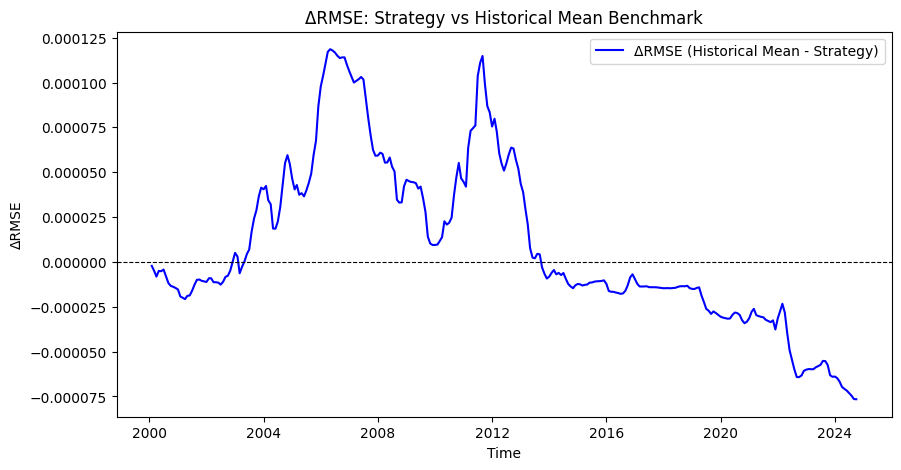

In [163]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Return'].dropna(how='all')


y_historical_mean_data=gc_data['GC1_Monthly_Return'].dropna(how='all')
data_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Cross Validation
if len(X_scaled) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_

        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    print("LASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []

    for t in range(start_train, n_obs - 1):
        # 使用当前时间 t 之前的所有数据进行训练
        X_train = X_scaled.iloc[:t]
        y_train = y.iloc[:t]
        y_historical_mean=y_historical_mean_data.iloc[:t]
        # 预测下一步 t+1
        X_test = X_scaled.iloc[t:t+1]
        y_test = y.iloc[t:t+1]
        
        # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
        if len(selected_features) > 0:
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Add constant - 添加截距项
            X_train_selected = sm.add_constant(X_train_selected)
            X_test_selected = sm.add_constant(X_test_selected)

            # **确保测试数据的列顺序与训练数据一致**
            X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

            # 进行 OLS 回归
            ols_model = sm.OLS(y_train, X_train_selected).fit()
            y_pred = ols_model.predict(X_test_selected)

            # 计算策略预测误差 f_t+1
            forecast_error = float(y_test - y_pred)
        else:
            # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
            forecast_error = float(y_test - y_historical_mean.mean()*data_period)

        # 计算历史均值预测误差 m_t+1
        historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)

        # Cumulative SSE - 累计 SSE（均方误差）
        if t == start_train:
            SSE_model_cumsum.append(forecast_error ** 2)
            SSE_historical_cumsum.append(historical_mean_error ** 2)
        else:
            SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
            SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

    # Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
    delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                        np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

    # **绘制 ΔRMSE**
    plt.figure(figsize=(10, 5))
    plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("ΔRMSE")
    plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
    plt.legend()
    plt.show()


##### --- Duplicate Sicheng's Work by Alfred ---

In [164]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Return'].dropna(how='all')



y_historical_mean_data=gc_data['GC1_Monthly_Return'].dropna(how='all')
data_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


#checking 
#check_df = pd.DataFrame([gc_data['GC1_Monthly_Return'],y]).T
#check_df
y_historical_mean_data.head(30)

X
#X_scaled
x_variables_data #with 1 month lag for the actual data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,fed_eff_rate,fed_eff_rate_monthly_log_sum,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.8026,149.54,0.004153,NaN,NaN,NaN,NaN
1975-04-30,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.2288,124.02,0.003445,NaN,NaN,NaN,NaN
1975-05-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,11.8,8.1,NaN,-4.7510,114.58,0.003183,NaN,NaN,NaN,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.036611,0.067894,0.011352,-0.031680,-0.030101,-0.037859,0.022440,0.001434,0.006302,0.035560,...,3.4,3.9,68.2,2.4036,101.27,0.002813,9.984383e+07,31.814372,2.245859,0.0
2024-09-30,0.003152,-0.033085,-0.017191,-0.083178,-0.088641,0.291765,-0.073755,0.031744,0.023840,0.008580,...,3.3,4.0,66.4,2.4803,117.26,0.003257,1.014021e+08,10.870681,-12.609224,0.6
2024-10-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,3.0,4.1,67.9,2.8443,117.26,0.003257,NaN,-1.526427,5.831219,0.8


In [165]:

# Cross Validation
if len(X_scaled) >= n_splits * 2: #split it into 10 folds
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_ #smallest Lasso alpha means best fit of the model
        #print(best_alpha)
        
        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    print(lasso_coeff_df)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    
    print("\n\nLASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)
    
    print("\n\nThe selected features by the LASSO models are:") 
    shortern_dict = avg_lasso_coeff.to_dict()
    features_list = [key for key, val in shortern_dict.items() if val !=0]
    print(features_list)
    
    

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []


   const  SPX Index  NDX Index  DXY Curncy  USGG10YR Index  USGG2YR Index  \
0    0.0       -0.0        0.0   -0.007561             0.0           -0.0   
1    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
2    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
3    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
4    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
5    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
6    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
7    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
8    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   
9    0.0       -0.0        0.0   -0.000000            -0.0           -0.0   

   VIX Index  JPY Curncy  LEGATRUU Index  EMUSTRUU Index  ...  CPI_YoY  \
0        0.0        -0.0             0.0             0.0  ...      0.0   
1   

In [166]:
print(selected_features)

['DXY Curncy', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'US_Unemp', 'Cons_Conf', 'US_RIR', 'fed_eff_rate', 'fed_eff_rate_monthly_log_sum']


In [167]:


for t in range(start_train, n_obs - 1):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean=y_historical_mean_data.iloc[:t]
    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    
    # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        #print(X_train_selected.columns)

        # Add constant - 添加截距项
        X_train_selected = sm.add_constant(X_train_selected)
        X_test_selected = sm.add_constant(X_test_selected)

        # **确保测试数据的列顺序与训练数据一致**
        X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

        # 进行 OLS 回归
        ols_model = sm.OLS(y_train, X_train_selected).fit()
        y_pred = ols_model.predict(X_test_selected)

        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean()*data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean()*data_period)

    # Cumulative SSE - 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1)


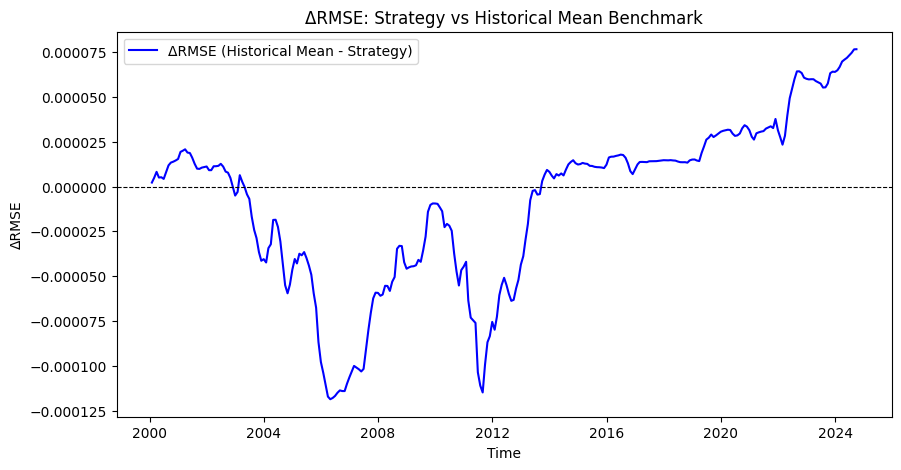

In [168]:
# **绘制 ΔRMSE**

plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


#### (In use)Below is using the variables that proofed Useful by LASSO and perform a time-series forecasting using Random Forest

In [169]:
import platform
import sys

print("Python executable:", sys.executable)
print("Architecture:", platform.architecture())

Python executable: /usr/local/bin/python
Architecture: ('64bit', '')


In [170]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Processing: 100%|██████████| 567/567 [00:37<00:00, 15.16it/s]

      Metric     Value
0  R-squared  0.708395
1        MSE  0.002342
2       RMSE  0.048393


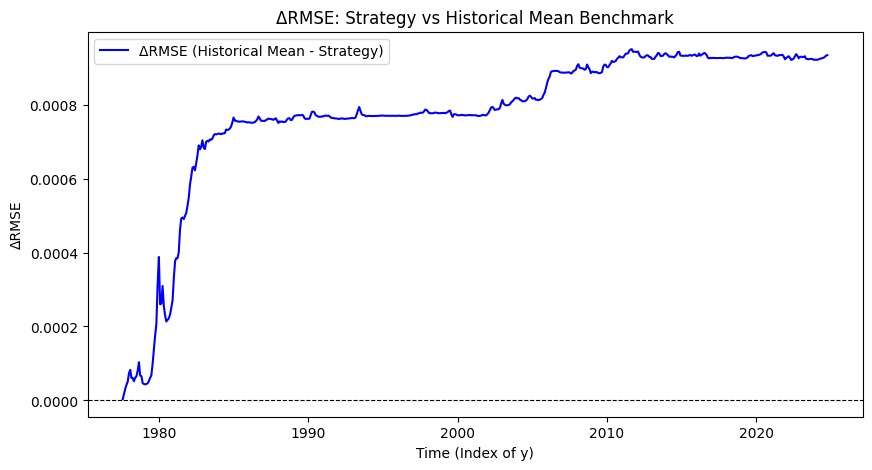

In [171]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [172]:
df_feature_avg_importance

,Feature,Avg Importance
0,DXY Curncy,0.069440
1,PCE CYOY Index,0.233224
2,GDP_Nominoal_YOY,0.134811
3,US_Unemp,0.121678
4,Cons_Conf,0.082595
5,US_RIR,0.139876
6,fed_eff_rate,0.112150
7,fed_eff_rate_monthly_log_sum,0.106226


In [173]:
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Time Index", inplace=True)
results.index.name = "Date"
results

,y_test,y_pred,historical_mean_error
Date,,,
1977-07-31,0.063134,-0.042806,-0.058882
1977-08-31,0.103184,0.011556,-0.055581
1977-09-30,0.076525,0.037413,-0.052494
1977-10-31,0.069568,0.061839,-0.042050
1977-11-30,0.069874,0.085984,-0.032468
...,...,...,...
2024-05-31,0.042954,0.026423,0.009222
2024-06-30,0.065946,0.023275,0.009261
2024-07-31,0.109957,0.024754,0.009289


In [174]:
results

,y_test,y_pred,historical_mean_error
Date,,,
1977-07-31,0.063134,-0.042806,-0.058882
1977-08-31,0.103184,0.011556,-0.055581
1977-09-30,0.076525,0.037413,-0.052494
1977-10-31,0.069568,0.061839,-0.042050
1977-11-30,0.069874,0.085984,-0.032468
...,...,...,...
2024-05-31,0.042954,0.026423,0.009222
2024-06-30,0.065946,0.023275,0.009261
2024-07-31,0.109957,0.024754,0.009289


#### Alfred Redo with fewer parameters

In [175]:
selected_features_2 = ['SPX Index',
 'CPI YOY Index',
 'GDP_Nominoal_YOY',
 'GDP_Real_QoQ',
 'US_Unemp',
 'US_RIR']

 # select one between 'GDP_Real_QoQ' or 'GDP_Nominoal_YOY'

Processing: 100%|██████████| 567/567 [00:32<00:00, 17.41it/s]

      Metric     Value
0  R-squared  0.717339
1        MSE  0.002270
2       RMSE  0.047645


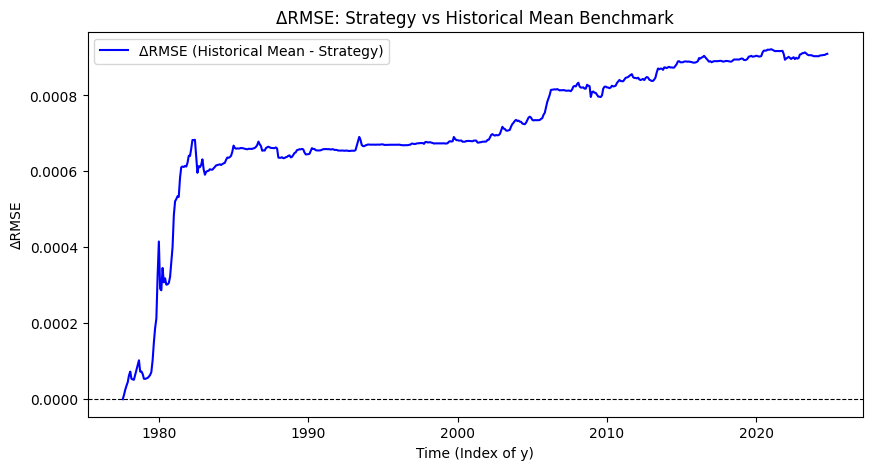

In [176]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost

#Use Random Forest for Prediction
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林


# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features_2]
        X_test_selected = X_test[selected_features_2]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [177]:
model_summary

{'Model': 'RandomForestRegressor',
 'R-squared': 0.717339005460639,
 'MSE': 0.002270023221429639,
 'RMSE': np.float64(0.047644760692332574),
 'Feature Importance': {'SPX Index': np.float64(0.09009177273666039),
  'CPI YOY Index': np.float64(0.23604146864282374),
  'GDP_Nominoal_YOY': np.float64(0.20146191959885681),
  'GDP_Real_QoQ': np.float64(0.1816621089606751),
  'US_Unemp': np.float64(0.14054727297979114),
  'US_RIR': np.float64(0.1501954570811928)}}

In [178]:
results

,Time Index,y_test,y_pred,historical_mean_error
0,1977-07-31,0.063134,-0.064523,-0.058882
1,1977-08-31,0.103184,-0.006412,-0.055581
2,1977-09-30,0.076525,0.039383,-0.052494
3,1977-10-31,0.069568,0.051722,-0.042050
4,1977-11-30,0.069874,0.074872,-0.032468
...,...,...,...,...
562,2024-05-31,0.042954,0.021106,0.009222
563,2024-06-30,0.065946,0.015141,0.009261
564,2024-07-31,0.109957,0.010607,0.009289
565,2024-08-31,0.115838,0.020974,0.009609


## <font color="yellow">Time Series Momentum Strategy</font>

#### Step 0: Continue from Time Series Dataframe in Previous Work

In [179]:
#View Gold price futures data
gc_data
#gc_data.to_csv("gc_data_raw.csv")

#gc_data.columns


,GC1_Monthly_Return,GC2_Monthly_Return,GC1_volatility,GC2_volatility,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign,GC1_OPEN_INT,GC1_sharpe,GC2_sharpe
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,-0.063152,-1.0,-1.0,-0.266698,-0.258326,-1.0,-1.0,NaN,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-0.066362,-1.0,-1.0,-0.362517,-0.354593,-1.0,-1.0,NaN,NaN,NaN
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,-0.153495,-1.0,-1.0,-0.374604,-0.361893,-1.0,-1.0,NaN,-2.659513,-2.845199
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,-0.252558,-1.0,-1.0,-0.364604,-0.355780,-1.0,-1.0,NaN,-4.430367,-4.477641
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,-0.176743,-1.0,-1.0,-0.300239,-0.296995,-1.0,-1.0,NaN,-0.339849,-0.172193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.334165,2.024430,1.998572
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.773346,3.832386,3.733383
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.034246,3.498084,3.463945


#### Step 1: Modify Dataframe

##### <font color= #90EE90> 1.1: Formulate Next Month (Actual) Sharpe Ratio </font> 

In [180]:
#Create new copy specifically for time series moementum strategy



gc_data.rename(columns={'GC1_volatility':'GC1_vol_annualized','GC2_volatility':'GC2_vol_annualized'},inplace=True)
gc_data_new = gc_data.copy()

#Calculate Actual Sharpe Ratio - Monthly
gc_data_new['GC1_vol_monthly'] = gc_data_new['GC1_vol_annualized']/ np.sqrt(12)
gc_data_new['GC2_vol_monthly'] = gc_data_new['GC2_vol_annualized']/ np.sqrt(12)

#Produce 1 Month historical and forward (actual) Sharpe Ratio
gc_data_new.rename(columns={'GC1_sharpe':'GC1_sharpe_1M_Hist','GC2_sharpe':'GC2_sharpe_1M_Hist'},inplace=True)
gc_data_new['GC1_sharpe_1M_Hist'] = gc_data_new['GC1_Monthly_Return']/gc_data_new['GC1_vol_monthly']
gc_data_new['GC2_sharpe_1M_Hist'] = gc_data_new['GC2_Monthly_Return']/gc_data_new['GC2_vol_monthly']
gc_data_new['GC1_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC1_Monthly_Return']/gc_data_new['GC1_vol_monthly'].shift(1)
gc_data_new['GC2_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC2_Monthly_Return']/gc_data_new['GC2_vol_monthly'].shift(1)
gc_data_new['GC1_sharpe_1M_Fwd'] = gc_data_new['GC1_sharpe_1M_Hist'].shift(1)
gc_data_new['GC2_sharpe_1M_Fwd'] = gc_data_new['GC2_sharpe_1M_Hist'].shift(1)

#Export CSV
gc_data_new.to_csv("gc_data_v1.csv")
gc_data_new




,GC1_Monthly_Return,GC2_Monthly_Return,GC1_vol_annualized,GC2_vol_annualized,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_12M_Fwd_Sign,GC1_OPEN_INT,GC1_sharpe_1M_Hist,GC2_sharpe_1M_Hist,GC1_vol_monthly,GC2_vol_monthly,GC1_sharpe_1M_RetHist_VolLag1,GC2_sharpe_1M_RetHist_VolLag1,GC1_sharpe_1M_Fwd,GC2_sharpe_1M_Fwd
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,-1.0,NaN,-0.767735,-0.821338,0.046831,0.046529,NaN,NaN,NaN,NaN
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,-1.0,NaN,-1.278937,-1.292584,0.049488,0.049700,-1.351478,-1.380658,-0.767735,-0.821338
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,-1.0,NaN,-0.098106,-0.049708,0.050860,0.052257,-0.100827,-0.052266,-1.278937,-1.292584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,NaN,1.334165,0.584403,0.576938,0.048566,0.048898,0.560344,0.549390,0.655714,0.639243
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,NaN,-2.773346,1.106315,1.077735,0.043714,0.044520,0.995788,0.981241,0.584403,0.576938
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,NaN,5.034246,1.009810,0.999955,0.038715,0.039240,0.894315,0.881368,1.106315,1.077735


##### <font color= #90EE90> 1.2: Shift 1 month for 3M, 6M, 12M Return Sign  </font> 

In [181]:
shift_columns = ['GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in shift_columns:
    gc_data_new[col+'_lag_1']=gc_data_new[col].shift(2)

#shift 1 month as well
gc_data_new['GC2_1M_Sign_lag_1']=gc_data_new['GC2_1M_Sign'].shift(1)
gc_data_new['GC1_1M_Sign_lag_1']=gc_data_new['GC1_1M_Sign'].shift(1)

gc_data_new.to_csv("gc_data_v1.csv")
gc_data_new

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_vol_annualized,GC2_vol_annualized,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_sharpe_1M_Fwd,GC2_sharpe_1M_Fwd,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1,GC2_1M_Sign_lag_1,GC1_1M_Sign_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,-0.767735,-0.821338,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,-1.278937,-1.292584,1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,0.655714,0.639243,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,0.584403,0.576938,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,1.106315,1.077735,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Step 2: Create Train-Calibrate-Test Split Dataset

##### <font color= #90EE90> _2.1: Separate dataframes_ </font> 

In [182]:
GC2_Features = ['GC2_1M_Sign','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
GC1_Features = ['GC1_1M_Sign','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']

#gc2 only
xy_tsm = gc_data_new[['GC2_sharpe_1M_Hist']+ ['GC2_sharpe_1M_Fwd'] + ['GC2_sharpe_1M_RetHist_VolLag1'] + GC2_Features].dropna(how='any')

y_tsm = pd.DataFrame()

y_tsm['GC2_sharpe_1M_RetT_VolT-1'] = xy_tsm['GC2_sharpe_1M_RetHist_VolLag1']
x_tsm = xy_tsm[[col for col in GC2_Features]]

#checking
#x_tsm

y_tsm.to_csv("y_tsm.csv")

y_tsm

#xy_tsm


,GC2_sharpe_1M_RetT_VolT-1
Date,
1976-02-29,0.419995
1976-03-31,-0.453622
1976-04-30,0.002410
1976-05-31,-0.555620
1976-06-30,-0.608171
...,...
2024-08-31,0.549390
2024-09-30,0.981241
2024-10-31,0.881368


##### <font color= #90EE90> _2.2: Define Cross Validation Fold_ </font> 

Method: Rolling folds that trains every month

In [183]:
train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period

calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 

test_date = calib_end + pd.DateOffset(months=1)


#### Step 3: Train Model

In [184]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm


##### **Test Code (1 iteration)**

In [185]:
"""
#Design rolling loop algorithm

results = []

#while test_date <= pd.Timestamp('2010-12-31'):
    
#create train dataset
x_tsm_train = x_tsm.loc[:train_end]
y_tsm_train = y_tsm.loc[:train_end]

#create calibration dataset
x_tsm_calib = x_tsm.loc[calib_start:calib_end]
y_tsm_calib = y_tsm.loc[calib_start:calib_end]

#test data
x_tsm_test = x_tsm.loc[test_date:test_date]

#define alpha and error before loop
best_alpha = None
least_error = np.inf

#checking
x_tsm_train

"""

"\n#Design rolling loop algorithm\n\nresults = []\n\n#while test_date <= pd.Timestamp('2010-12-31'):\n    \n#create train dataset\nx_tsm_train = x_tsm.loc[:train_end]\ny_tsm_train = y_tsm.loc[:train_end]\n\n#create calibration dataset\nx_tsm_calib = x_tsm.loc[calib_start:calib_end]\ny_tsm_calib = y_tsm.loc[calib_start:calib_end]\n\n#test data\nx_tsm_test = x_tsm.loc[test_date:test_date]\n\n#define alpha and error before loop\nbest_alpha = None\nleast_error = np.inf\n\n#checking\nx_tsm_train\n\n"

In [186]:
"""
for a in alphas:
    if regression_type == 'ridge':
        candidate_model = Ridge(alpha= a)
    else: #assume lasso
        candidate_model = Lasso(alpha= a, max_iter=2000)
        
#fit the model in the calibration set
candidate_model.fit(x_tsm_train, y_tsm_train)
y_tsm_pred = candidate_model.predict(x_tsm_calib)
error = mean_squared_error(y_tsm_calib,y_tsm_pred)

if error < least_error:
    least_error = error
    best_alpha = a

#combine training and calibration set
x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

#train the final model with the best alpha over training + calibration timeframe
if regression_type == 'ridge':
    final_model = Ridge(alpha= best_alpha)
else: #assume lasso
    final_model = Lasso(alpha= best_alpha, max_iter=2000)

final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)


#forecasting the test month
forecast = final_model.predict(x_tsm_test)[0]
realized = x_tsm_test.iloc[0,0]

#iteration results
results.append({
    'train_end': train_end,
    'calib_start': calib_start,
    'calib_end': calib_end,
    'test_date': test_date,
    'best_alpha': best_alpha,
    'forecast': forecast,
    'realized': realized,
    'calib_error': least_error
})

#expand the windows for next interation
#train - calibrate - test split
train_end = train_end + pd.DateOffset(months=1) #Expand 1 month
calib_start = calib_start + pd.DateOffset(months=1)  #Slide 1 month
calib_end = test_date                              #Slide 1 month (i.e. previous test date)
test_date = test_date + pd.DateOffset(months=1) #Slide to next month for prediction
    
#results_df = pd.DataFrame(results)

results
"""

"\nfor a in alphas:\n    if regression_type == 'ridge':\n        candidate_model = Ridge(alpha= a)\n    else: #assume lasso\n        candidate_model = Lasso(alpha= a, max_iter=2000)\n        \n#fit the model in the calibration set\ncandidate_model.fit(x_tsm_train, y_tsm_train)\ny_tsm_pred = candidate_model.predict(x_tsm_calib)\nerror = mean_squared_error(y_tsm_calib,y_tsm_pred)\n\nif error < least_error:\n    least_error = error\n    best_alpha = a\n\n#combine training and calibration set\nx_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])\ny_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])\n\n#train the final model with the best alpha over training + calibration timeframe\nif regression_type == 'ridge':\n    final_model = Ridge(alpha= best_alpha)\nelse: #assume lasso\n    final_model = Lasso(alpha= best_alpha, max_iter=2000)\n\nfinal_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)\n\n\n#forecasting the test month\nforecast = final_model.predict(x_tsm_test)[

##### **While-Loop Iteration**

In [187]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'ridge'
alphas = np.logspace(4,-4,100).tolist()
#alphas

In [188]:
x_tsm.to_csv("x_tsm.csv")
y_tsm.to_csv("y_tsm.csv")

In [189]:
#Design rolling loop algorithm

results = []

#apply tqdm for manual progress bar
pbar = tqdm(total=y_tsm.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= y_tsm.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    #create train dataset
    x_tsm_train = x_tsm.loc[:train_end]
    y_tsm_train = y_tsm.loc[:train_end]

    #create calibration dataset
    x_tsm_calib = x_tsm.loc[calib_start:calib_end]
    y_tsm_calib = y_tsm.loc[calib_start:calib_end]

    #test data
    x_tsm_test = x_tsm.loc[test_date:test_date]
    y_tsm_test = y_tsm.loc[test_date:test_date]

    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    #checking
    x_tsm_train

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
            
        #fit the model in the calibration set
        candidate_model.fit(x_tsm_train, y_tsm_train)
        y_tsm_pred = candidate_model.predict(x_tsm_calib)
        error = mean_squared_error(y_tsm_calib,y_tsm_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
    y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)
    #forecasting the test month
    forecast = final_model.predict(x_tsm_test)[0]
    realized = y_tsm_test.iloc[0,0]

    #iteration results
    results.append({
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error
    })

    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    i = i+1
    pbar.update(1)

pbar.close()

results_df = pd.DataFrame(results)
results_df

Rolling Window Iterations: 100%|██████████| 348/348 [00:36<00:00,  9.45it/s]


,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error
0,1990-12-31,1991-01-31,1995-12-31,1996-01-31,12.328467,0.726792,2.593148,0.452938
1,1991-01-31,1991-02-28,1996-01-31,1996-02-29,8.497534,-0.752886,-0.750387,0.504453
2,1991-02-28,1991-03-31,1996-02-29,1996-03-31,8.497534,-0.748203,-0.692036,0.502293
3,1991-03-31,1991-04-30,1996-03-31,1996-04-30,7.054802,-0.752052,-0.383687,0.501045
4,1991-04-30,1991-05-31,1996-04-30,1996-05-31,5.857021,-0.755574,-0.327554,0.491091
...,...,...,...,...,...,...,...,...
343,2019-07-31,2019-08-31,2024-07-31,2024-08-31,45.348785,0.832692,0.549390,0.298632
344,2019-08-31,2019-09-30,2024-08-31,2024-09-30,65.793322,0.808666,0.981241,0.281768
345,2019-09-30,2019-10-31,2024-09-30,2024-10-31,65.793322,0.809604,0.881368,0.278312
346,2019-10-31,2019-11-30,2024-10-31,2024-11-30,65.793322,-0.638544,-0.931503,0.278383


##### **Model Results**

In [203]:
#results_df.to_excel("results_df_lasso1.xlsx")
results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error
0,1990-12-31,1991-01-31,1995-12-31,1996-01-31,12.328467,0.726792,2.593148,0.452938
1,1991-01-31,1991-02-28,1996-01-31,1996-02-29,8.497534,-0.752886,-0.750387,0.504453
2,1991-02-28,1991-03-31,1996-02-29,1996-03-31,8.497534,-0.748203,-0.692036,0.502293
3,1991-03-31,1991-04-30,1996-03-31,1996-04-30,7.054802,-0.752052,-0.383687,0.501045
4,1991-04-30,1991-05-31,1996-04-30,1996-05-31,5.857021,-0.755574,-0.327554,0.491091
...,...,...,...,...,...,...,...,...
343,2019-07-31,2019-08-31,2024-07-31,2024-08-31,45.348785,0.832692,0.549390,0.298632
344,2019-08-31,2019-09-30,2024-08-31,2024-09-30,65.793322,0.808666,0.981241,0.281768
345,2019-09-30,2019-10-31,2024-09-30,2024-10-31,65.793322,0.809604,0.881368,0.278312
346,2019-10-31,2019-11-30,2024-10-31,2024-11-30,65.793322,-0.638544,-0.931503,0.278383


#### Step 4: Evaluate Model

In [191]:
y_tsm

,GC2_sharpe_1M_RetT_VolT-1
Date,
1976-02-29,0.419995
1976-03-31,-0.453622
1976-04-30,0.002410
1976-05-31,-0.555620
1976-06-30,-0.608171
...,...
2024-08-31,0.549390
2024-09-30,0.981241
2024-10-31,0.881368


##### **Calculate Historical Mean**

In [205]:
#calcualte historical expanding mean
y_tsm_with_mean = y_tsm.copy()

#choose between expanding or sliding appraoch
#y_tsm_with_mean['hist_mean'] = y_tsm_with_mean['GC2_sharpe_1M_RetT_VolT-1'].expanding(min_periods=1).mean()
y_tsm_with_mean['hist_mean'] = y_tsm_with_mean['GC2_sharpe_1M_RetT_VolT-1'].rolling(window=12, min_periods=1).mean()

#include historical expanding mean in results df
results_df_2 = results_df.copy()
results_df_2 = results_df_2.set_index('test_date')
results_df_2 = results_df_2.join(y_tsm_with_mean['hist_mean'], how='left')

results_df_2

,train_end,calib_start,calib_end,best_alpha,forecast,realized,calib_error,hist_mean
test_date,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,12.328467,0.726792,2.593148,0.452938,0.188932
1996-02-29,1991-01-31,1991-02-28,1996-01-31,8.497534,-0.752886,-0.750387,0.504453,0.104755
1996-03-31,1991-02-28,1991-03-31,1996-02-29,8.497534,-0.748203,-0.692036,0.502293,-0.060956
1996-04-30,1991-03-31,1991-04-30,1996-03-31,7.054802,-0.752052,-0.383687,0.501045,-0.058980
1996-05-31,1991-04-30,1991-05-31,1996-04-30,5.857021,-0.755574,-0.327554,0.491091,-0.036241
...,...,...,...,...,...,...,...,...
2024-08-31,2019-07-31,2019-08-31,2024-07-31,45.348785,0.832692,0.549390,0.298632,0.485596
2024-09-30,2019-08-31,2019-09-30,2024-08-31,65.793322,0.808666,0.981241,0.281768,0.712371
2024-10-31,2019-09-30,2019-10-31,2024-09-30,65.793322,0.809604,0.881368,0.278312,0.579933


In [201]:
y_tsm
x_tsm
gc_data_new

,GC1_Monthly_Return,GC2_Monthly_Return,GC1_vol_annualized,GC2_vol_annualized,GC2_OPEN_INT,GC2_1M_Sign,GC1_1M_Sign,GC2_3M_Ret,GC1_3M_Ret,GC2_3M_Sign,...,GC1_sharpe_1M_Fwd,GC2_sharpe_1M_Fwd,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1,GC2_1M_Sign_lag_1,GC1_1M_Sign_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,-0.001872,-0.005276,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.038402,0.039981,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
1975-03-31,-0.035954,-0.038216,0.162229,0.161182,NaN,-1.0,-1.0,-0.003512,0.000577,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1975-04-30,-0.063292,-0.064241,0.171430,0.172165,NaN,-1.0,-1.0,-0.062476,-0.060843,-1.0,...,-0.767735,-0.821338,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
1975-05-31,-0.004990,-0.002598,0.176185,0.181025,NaN,-1.0,-1.0,-0.105055,-0.104235,-1.0,...,-1.278937,-1.292584,1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.028382,0.028211,0.168238,0.169387,2.030054,1.0,1.0,0.065317,0.065946,1.0,...,0.655714,0.639243,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.048362,0.047981,0.151431,0.154221,0.095934,1.0,1.0,0.109016,0.109957,1.0,...,0.584403,0.576938,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.039094,0.039238,0.134111,0.135932,-1.598552,1.0,1.0,0.115430,0.115838,1.0,...,1.106315,1.077735,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##### **Generate Evalution Statistics**

In [206]:
#calculate RMSE, RMSE diff, cummulative RMSE diff, OOS R-Sq Stat

#SSE
results_df_2['SSE_forecast'] = (results_df_2['realized'] - results_df_2['forecast'])**2
results_df_2['SSE_hist'] = (results_df_2['realized'] - results_df_2['hist_mean'])**2
results_df_2['row_num'] = np.arange(1,len(results_df_2)+1)

#Cummulative SSE
results_df_2['Cum_SSE_forecast'] = results_df_2['SSE_forecast'].expanding(min_periods=1).sum()
results_df_2['Cum_SSE_hist'] = results_df_2['SSE_hist'].expanding(min_periods=1).sum()

#RMSE
results_df_2['RMSE_forecast'] = np.sqrt(results_df_2['SSE_forecast']/results_df_2['row_num'])
results_df_2['RMSE_hist'] = np.sqrt(results_df_2['SSE_hist']/results_df_2['row_num'])

#RMSE diff and cummulaitve RMSE diff
results_df_2['RMSE_diff'] = results_df_2['RMSE_hist'] - results_df_2['RMSE_forecast']
results_df_2['Cum_RMSE_diff'] = results_df_2['RMSE_diff'].expanding(min_periods=1).sum()

#OOS R-Sq Stat
results_df_2['R_Sq_OOS'] = 1 - (results_df_2['Cum_SSE_forecast']/ results_df_2['Cum_SSE_hist'])

results_df_2.to_csv("results_df_2_ridge1_20250215.csv")
results_df_2



,train_end,calib_start,calib_end,best_alpha,forecast,realized,calib_error,hist_mean,SSE_forecast,SSE_hist,row_num,Cum_SSE_forecast,Cum_SSE_hist,RMSE_forecast,RMSE_hist,RMSE_diff,Cum_RMSE_diff,R_Sq_OOS
test_date,,,,,,,,,,,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,12.328467,0.726792,2.593148,0.452938,0.188932,3.483285,5.780252,1,3.483285,5.780252,1.866356,2.404216,0.537860,0.537860,0.397382
1996-02-29,1991-01-31,1991-02-28,1996-01-31,8.497534,-0.752886,-0.750387,0.504453,0.104755,0.000006,0.731266,2,3.483291,6.511519,0.001767,0.604676,0.602909,1.140768,0.465057
1996-03-31,1991-02-28,1991-03-31,1996-02-29,8.497534,-0.748203,-0.692036,0.502293,-0.060956,0.003155,0.398262,3,3.486446,6.909780,0.032428,0.364354,0.331926,1.472694,0.495433
1996-04-30,1991-03-31,1991-04-30,1996-03-31,7.054802,-0.752052,-0.383687,0.501045,-0.058980,0.135693,0.105435,4,3.622138,7.015215,0.184183,0.162354,-0.021829,1.450865,0.483674
1996-05-31,1991-04-30,1991-05-31,1996-04-30,5.857021,-0.755574,-0.327554,0.491091,-0.036241,0.183201,0.084864,5,3.805339,7.100079,0.191416,0.130279,-0.061137,1.389728,0.464043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,2019-07-31,2019-08-31,2024-07-31,45.348785,0.832692,0.549390,0.298632,0.485596,0.080260,0.004070,344,176.170876,360.560113,0.015275,0.003440,-0.011835,9.863750,0.511397
2024-09-30,2019-08-31,2019-09-30,2024-08-31,65.793322,0.808666,0.981241,0.281768,0.712371,0.029782,0.072291,345,176.200659,360.632404,0.009291,0.014475,0.005184,9.868934,0.511412
2024-10-31,2019-09-30,2019-10-31,2024-09-30,65.793322,0.809604,0.881368,0.278312,0.579933,0.005150,0.090863,346,176.205809,360.723267,0.003858,0.016205,0.012347,9.881282,0.511521


##### **Plot Results**

In [194]:
import matplotlib.pyplot as plt

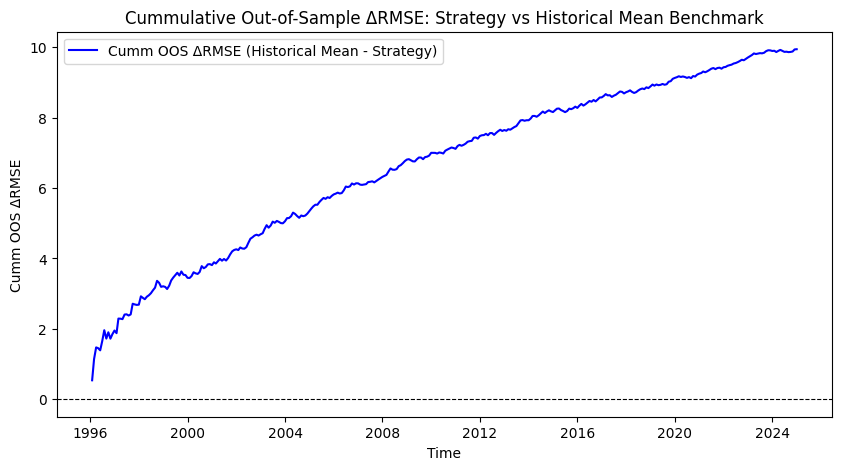

In [207]:
plt.figure(figsize=(10, 5))
plt.plot(results_df_2.index, results_df_2['Cum_RMSE_diff'], label="Cumm OOS ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("Cumm OOS ΔRMSE")
plt.title("Cummulative Out-of-Sample ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.legend()
plt.show()

-----------

### _Draft_

#### WIP: Below is the code to compare strategy performance, it's not good to use yet, has some bugs

In [196]:
# 计算策略回报
results["strategy_return"] = results["y_test"] * results["y_pred"].apply(lambda x: 1 if x > 0 else -1)

# 计算基准回报
results["benchmark_return"] = results["y_test"] * results["historical_mean_error"].apply(lambda x: 1 if x > 0 else -1)

# 计算买入持有回报
results["buy_and_hold_return"] = results["y_test"]

# 计算累积收益
results["cumulative_strategy"] = results["strategy_return"].cumsum()
results["cumulative_benchmark"] = results["benchmark_return"].cumsum()
results["cumulative_buy_and_hold"] = results["buy_and_hold_return"].cumsum()

# 计算 Sharpe Ratio
def sharpe_ratio(returns):
    return returns.mean() / returns.std() * 12 if returns.std() != 0 else np.nan

sharpe_strategy = sharpe_ratio(results["strategy_return"])
sharpe_benchmark = sharpe_ratio(results["benchmark_return"])
sharpe_buy_and_hold = sharpe_ratio(results["buy_and_hold_return"])

# 计算最大回撤
def max_drawdown(cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    return drawdown.min()

max_dd_strategy = max_drawdown(results["cumulative_strategy"])
max_dd_benchmark = max_drawdown(results["benchmark_cum_return"])
max_dd_buy_and_hold = max_drawdown(results["buy_and_hold_cum_return"])

# 输出结果
performance_metrics = pd.DataFrame({
    "Sharpe Ratio": [sharpe_strategy, sharpe_benchmark, sharpe_buy_and_hold],
    "Max Drawdown": [max_dd_strategy, max_dd_benchmark, max_dd_buy_and_hold]
}, index=["Strategy", "Benchmark", "Buy & Hold"])
# 绘制收益曲线
plt.figure(figsize=(10, 6))
plt.plot(results.index, results["cumulative_strategy"], label="Strategy Return", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label="Benchmark Return", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
print(performance_metrics)

TypeError: list indices must be integers or slices, not str

#### Placeholder: Below is experiment code on random forest with CALIBRATION, doesn't have good performance yet

Processing: 100%|██████████| 497/497 [02:30<00:00,  3.29it/s]


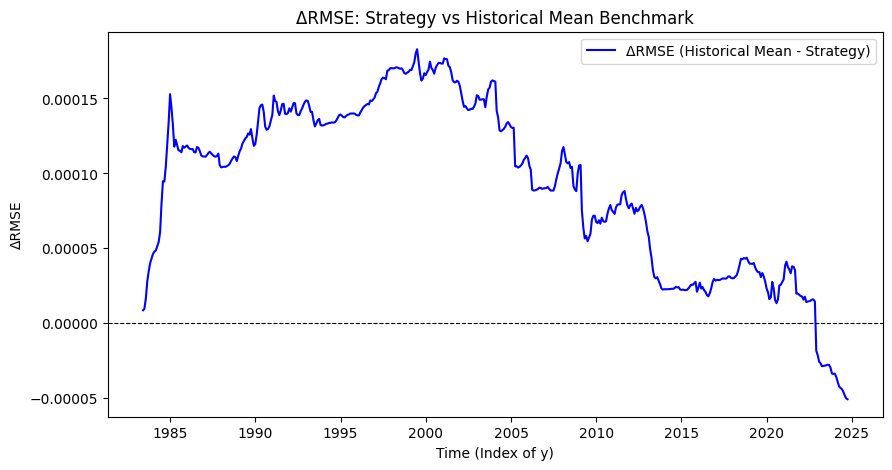

In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.isotonic import IsotonicRegression  # 替换 Logistic Regression

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []

# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归

# Isotonic Regression 校准模型
calibration_model = IsotonicRegression(out_of_bounds='clip')

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # **划分训练集（80%）、校准集（20%）**
    split_idx = int(0.8 * t)  # 80% 作为训练集，20% 作为校准集
    X_train = X_scaled.iloc[:split_idx]
    y_train = y.iloc[:split_idx]

    X_calib = X_scaled.iloc[split_idx:t]
    y_calib = y.iloc[split_idx:t]

    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_calib_selected = X_calib[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练回归模型
        model.fit(X_train_selected, y_train)

        # **校准步骤**
        y_calib_pred = model.predict(X_calib_selected)  # 获取校准集的预测值（scores）
        calibration_model.fit(y_calib_pred, y_calib)  # 训练 Isotonic Regression 进行校准

        # **在测试集上应用校准**
        y_pred_raw = model.predict(X_test_selected)  # 先用回归模型预测
        y_pred_calibrated = calibration_model.predict(y_pred_raw)  # 用 Isotonic Regression 进行校准
        
        forecast_error = float(y_test - y_pred_calibrated)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()

